In [8]:
import pandas as pd

In [9]:
df = pd.read_csv('data/CC GENERAL.csv')

In [10]:
df.isnull().sum().sum()

314

In [11]:
df.fillna(df.mean(), inplace = True)
df['MINIMUM_PAYMENTS'].mean()

C:\Users\evgen\AppData\Local\Temp\ipykernel_2124\1647922268.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace = True)


864.2065423050827

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
df.drop('CUST_ID', axis = 1, inplace = True)
X = df.values
scaler = StandardScaler()
scaler.fit(X)
X_norm = scaler.transform(X)
X_norm[0][0]

-0.7319893664465486

In [17]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

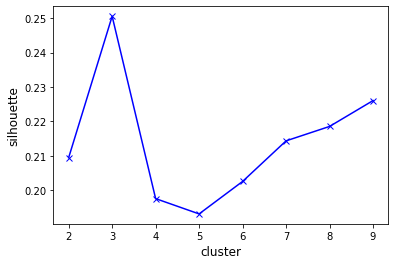

In [18]:
def get_silhouette(cluster_num, df):
    k_means =  KMeans(n_clusters=cluster_num, random_state=42)
    k_means.fit(df)
    silhouette = silhouette_score(df, k_means.labels_, metric='euclidean')
    return silhouette
from sklearn.metrics import silhouette_score
silhouettes = []
for i in range(2, 10):
    silhouettes.append(get_silhouette(i ,X_norm))
    
plt.xlabel("cluster", fontsize=12)
plt.ylabel("silhouette", fontsize=12)
plt.plot([i for i in range(2, 10)], silhouettes, 'xb-')

In [19]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_norm)
df.loc[:, 'label'] = kmeans.labels_
df.label.value_counts()

0    6118
1    1597
2    1235
Name: label, dtype: int64

In [22]:
from sklearn.cluster import DBSCAN

In [23]:
db = DBSCAN()
db.fit(X_norm)
clusters = db.labels_
len(set(clusters)) - (1 if -1 in clusters else 0)

38

In [25]:
import numpy as np

In [26]:
siliuette_list_dbscan = []
 
for eps in np.arange(0.1,3,0.2):
    for min_sample in range(1,20,4):
        dbscan = DBSCAN(eps=eps, min_samples=min_sample)
        dbscan.fit(X_norm)
        sil_score = silhouette_score(X_norm, dbscan.labels_, metric='euclidean')
        siliuette_list_dbscan.append((eps, min_sample, sil_score, len(set(dbscan.labels_))) )
df_dbscan = pd.DataFrame(siliuette_list_dbscan, columns=['eps', 'min_samples', 'sil_score', 'number_of_clusters'])
df_dbscan.sort_values(by = 'sil_score')

,eps,min_samples,sil_score,number_of_clusters
11,0.5,5,-0.443701,39
16,0.7,5,-0.438837,29
6,0.3,5,-0.424475,42
7,0.3,9,-0.404209,15
30,1.3,1,-0.399305,1536
...,...,...,...,...
74,2.9,17,0.591924,2
66,2.7,5,0.592182,2
73,2.9,13,0.595399,2
72,2.9,9,0.603811,2


In [28]:
from sklearn.cluster import AgglomerativeClustering

In [29]:
siliuette_list_hierarchical = []
 
for cluster in range(3,10,1):
        agglomerative = AgglomerativeClustering(affinity='euclidean',n_clusters=cluster).fit_predict(X_norm)
        sil_score = silhouette_score(X_norm, agglomerative, metric='euclidean')
        siliuette_list_hierarchical.append((cluster, sil_score,len(set(agglomerative)) ) )
        
df_hierarchical = pd.DataFrame(siliuette_list_hierarchical, columns=['cluster', 'sil_score','number_of_clusters'])
 
 
df_hierarchical.sort_values(by = 'sil_score')

,cluster,sil_score,number_of_clusters
5,8,0.152035,8
6,9,0.153719,9
1,4,0.154709,4
4,7,0.156415,7
2,5,0.158069,5
0,3,0.173110,3
3,6,0.173356,6


In [30]:
model = AgglomerativeClustering(linkage='average', affinity='euclidean',n_clusters=6).fit(X_norm)
df['cluster_id'] = model.labels_
df['cluster_id'].value_counts()

1    8921
2      18
0       5
4       4
3       1
5       1
Name: cluster_id, dtype: int64

In [32]:
import seaborn as sns

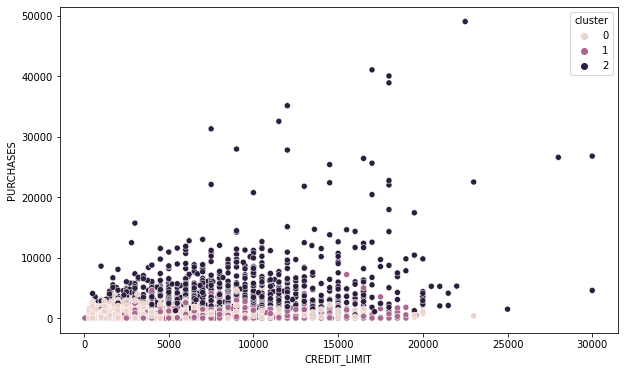

In [33]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_norm)
df['cluster'] = kmeans.labels_
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='CREDIT_LIMIT', y='PURCHASES', hue='cluster')
plt.show()